In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt 
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
sns.set()

## Loading the data

In [2]:
raw_csv_data = pd.read_csv('./3_1_index2018/Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Closing prices of four market indexes. 

### The numbers following the name indicates the number of companies included in the portofolio. 

### `spx` : S&P 500  (USA) 
### `dax` : DAX 30 (GERMANY)
### `ftse` : FTSE 100 (LONDON)
### `nikkei` : NIKKEI 225 (JAPAN)

## Exploratory data analysis. 

In [5]:
df_comp.size

31345

In [6]:
df_comp.shape

(6269, 5)

In [7]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## The values for _spx_ and _nikkei_ are smaller and bigger respectively compared to _dax_ and _ftse_.

In [9]:
df_comp.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting the data. 

### S&P prices.

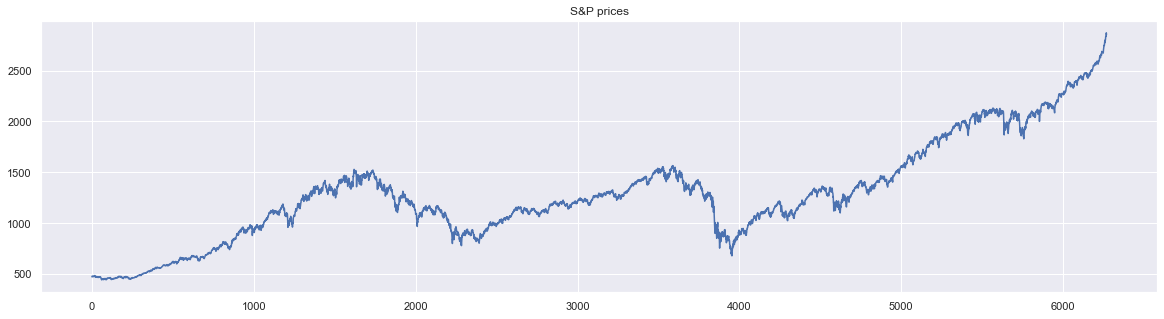

In [11]:
df_comp.spx.plot(figsize = (20,5),title = 'S&P prices')
plt.show()

### FTSE 100 prices. 

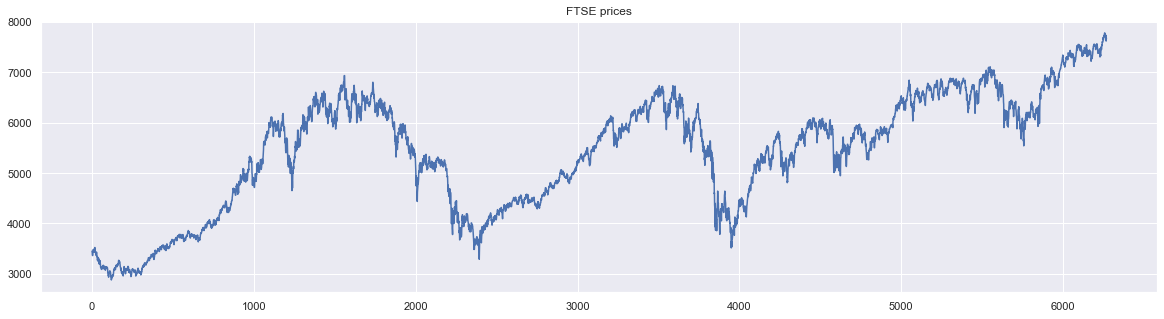

In [12]:
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE prices')
plt.show()

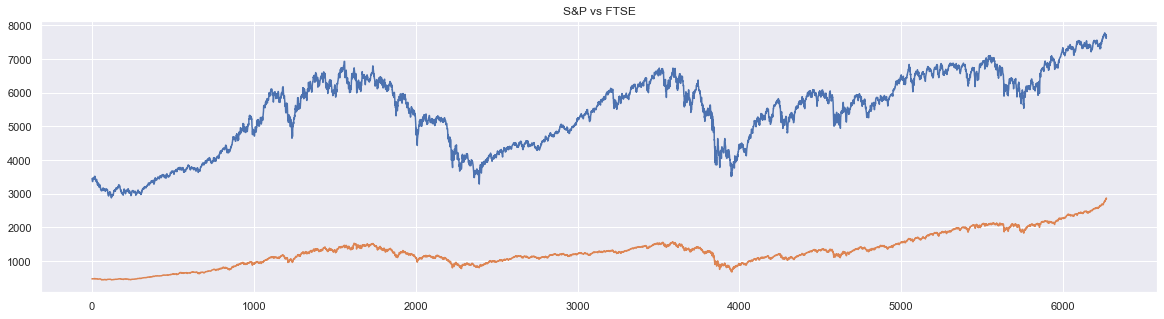

In [13]:
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE prices')
df_comp.spx.plot(figsize = (20,5),title = 'S&P prices')
plt.title('S&P vs FTSE')
plt.show()

## Based on the graph  S&P is flattern  which suggest that is more stable. Buyt this is due to its magnituded. 

## If we want to see the density of the data and which are the values that are more likely to occur we can use the quartile quartile plot. QQPLOT. 

## Quantile. Quantile Plot: used to determine whether a dataset is distributed in a certain way. 

## It usually showcases how the data fits a Normal distribution. 

In [14]:
import scipy.stats
import pylab

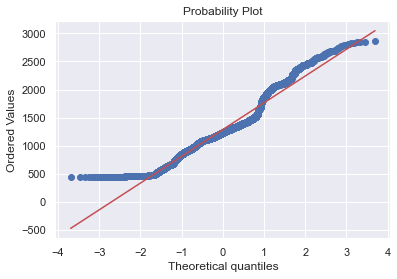

In [15]:
scipy.stats.probplot(df_comp.spx,plot=pylab)# first parameter is the series we want to test the second one is the way we want to express the plot. 
pylab.show()

## This plot takes all the values a variable can take and arranges them in accending order. 

## y : price , x: theoretical quantiles: How many standard deviations away from the mean these values are. 

## The red line indicates the distribution that the values must follow, a normal distribution. However, there are a lot of values refering to 500 so this data is not normally distributed. This is common on time series data.


## **Feature engineering**. 

In [16]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp.date.describe()

count           6269
unique          6269
top       17/11/2017
freq               1
Name: date, dtype: object

In [18]:
df_comp['date']=pd.to_datetime(df_comp.date,dayfirst=True) # this method assumes we are plugging in a string in a mm/dd/yyyy  but our data is dd/mm/yyyy


In [19]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [20]:
df_comp.date.describe()

<ipython-input-20-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the date column as the new index. 

In [21]:
df_comp.set_index('date',inplace=True)

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the frequency. 

In [23]:
df_comp = df_comp.asfreq('d')# for yearly data we use 'a for annualy

# We can state the frequency of the data for  hourly, daily weekly, monthly an so on. 



In [24]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


## Two new periods which have nan values.

## The data is recorded for week days so we are not interested in weekend days or holidays.

## We can ommit adding saturdays and sundays 

In [25]:
df_comp = df_comp.asfreq('b') # b states for bussines days 

In [26]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing values in the dataset. 

In [27]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

## Filling the missing values with the mean is innapropiate because we have underlying time variant patterns in the data.

In [28]:
df_comp.spx = df_comp.spx.fillna(method='ffill') # front fill, it used the previous value 

In [29]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill') # back fill, it used the next value 

In [30]:
df_comp.dax = df_comp.dax.fillna(method='ffill')
df_comp.nikkei = df_comp.nikkei.fillna(method = 'bfill')

In [31]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the Dataset. 

In [32]:
df_comp['market_value'] = df_comp.spx

In [33]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.690398,14597.597179,1288.642547
std,487.868210,2755.563853,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [34]:
df_comp.drop(['spx','ftse','nikkei','dax'],axis=1,inplace=True)

In [35]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the data. 

## Train and test.  We want to compare the predictions with actual values. 

In [36]:
size = int(len(df_comp)*0.8) # 80% for training. 

In [37]:
size

5021

In [38]:
df = df_comp.iloc[:size] # train set. 
df_test = df_comp.iloc[size:] # test set. 

In [39]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## If we want to update the data with more recent values using the yfinance library (optional)

In [41]:
# Importing the necessary package 
import yfinance 
# Ignoring warning messages
import warnings 
warnings.filterwarnings("ignore")

In [42]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2019-09-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

# tickers -> The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
# start -> The starting date of our data set
# end -> The ending date of our data set (at the time of upload, this is the current date)
# interval -> The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
# group_by -> The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
# auto_adjust -> Automatically adjust the closing prices for each period. 
# treads - > Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [43]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()

In [44]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

In [45]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values

In [46]:
print (df_comp.head()) # Displaying the first 5 elements to make sure the data was scraped correctly
print (df_comp.tail()) # Making sure the last day we're including in the series are correct

                   spx          dax         ftse        nikkei
                                                              
Date                                                          
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
1994-01-14  474.910004  2151.050049  3400.600098  18973.699219
                    spx           dax         ftse        nikkei
                                                                
Date                                                            
2019-09-23  2991.780029  12342.330078  7326.100098  22079.089844
2019-09-24  2966.600098  12307.150391  7291.399902  22098.839844
2019-09-25  2984.870117  12234.179688  7290.000000  22020.150391
2019-09-26  2977.620117  12288.540039  7351.100098  22048.240234
2019-09-27  2977.620117  12288.540039  73

## **WORKING WITH TIME SERIES IN PYTHON**

## White noise. 

### White noise is a special type of time-series where the data doesn't follow a pattern. 

### It has a constant mean, a constant variance and no autocorrelation in any period.

### No autocorrelation:  there is no relation with the past and the future. 

### White noise is only a sequence of random data where every value has a time period associated with it. 







In [47]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [48]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [49]:
wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(),size = len(df))

In [50]:
df['wn'] = wn

In [51]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1040.185714
1994-01-10,475.27,1236.217711
1994-01-11,474.13,639.492982
1994-01-12,474.17,957.210392
1994-01-13,472.47,1522.447702


In [52]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.459340
std,292.559287,294.693704
min,438.920000,-35.467171
25%,914.620000,893.390935
50%,1144.650000,1091.987975
75%,1316.280729,1291.411128
max,1570.252238,2301.615216


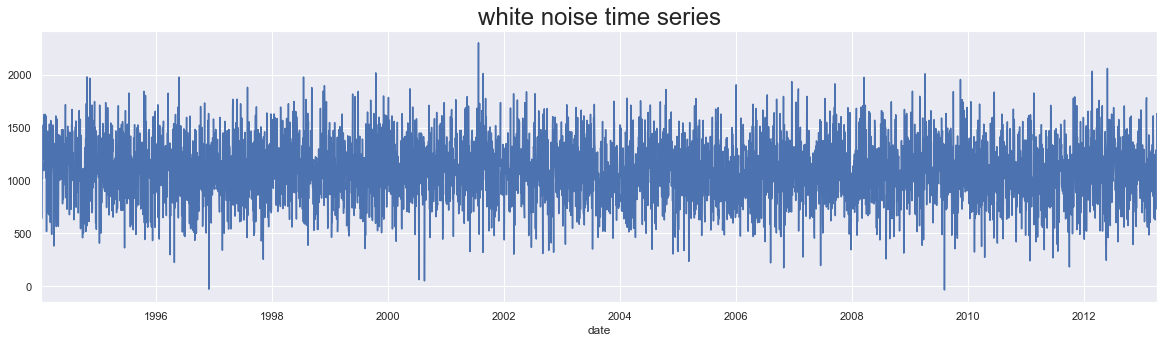

In [53]:
df.wn.plot(figsize = (20,5))
plt.title('white noise time series',size = 24)
plt.show()

## Must of the values are near to its mean. 

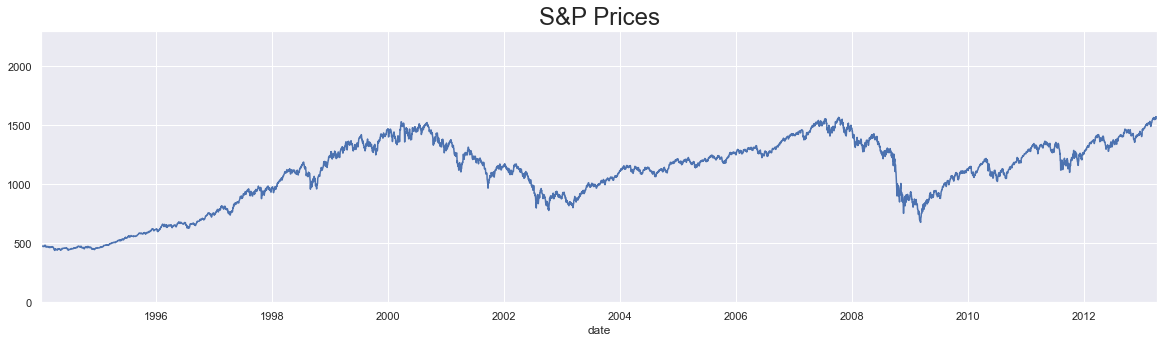

In [54]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0,2300)
plt.show()

## **Random walk**. 

###  The values tend to persist over time and the differences between periods are simply white noise. 

### Prices: $P_{t}$ , residuals $\epsilon_{t}$ 

### We assume the residuals  $\epsilon_{t}$  are white noise they are arbitrary and cannot be predicted. 

### This suggest that the best way to preddict prices of today are the prices from yesterday. 

### $P_{t} = P_{t-1} + \epsilon_{t}$



 

In [55]:
rw = pd.read_csv('./5_2_randwalk-csv/RandWalk.csv')

In [56]:
rw.date = pd.to_datetime(rw.date ,dayfirst= True)
rw.set_index('date',inplace=True)
rw = rw.asfreq('b')


In [57]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [58]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [59]:
df['rw'] = rw.price

In [60]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1040.185714,1122.139662
1994-01-10,475.27,1236.217711,1080.347860
1994-01-11,474.13,639.492982,1082.095245
1994-01-12,474.17,957.210392,1083.639265
1994-01-13,472.47,1522.447702,1067.146255


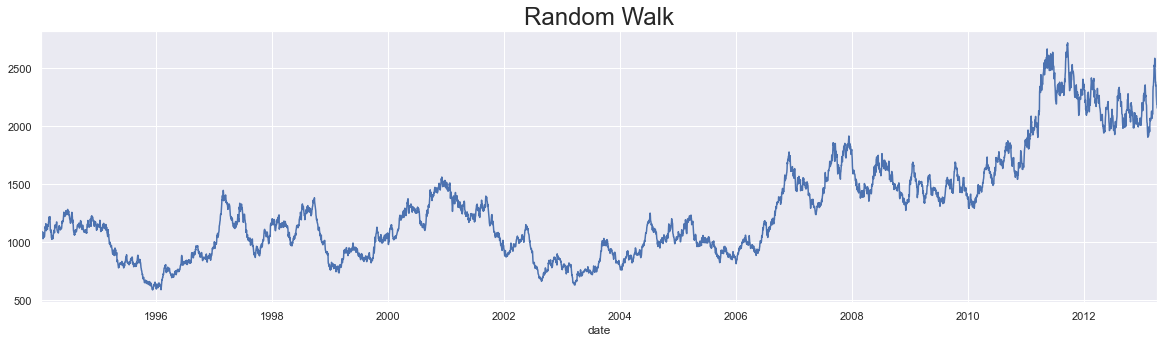

In [61]:
df.rw.plot(figsize = (20,5))
plt.title('Random Walk' , size = 24)
plt.show()

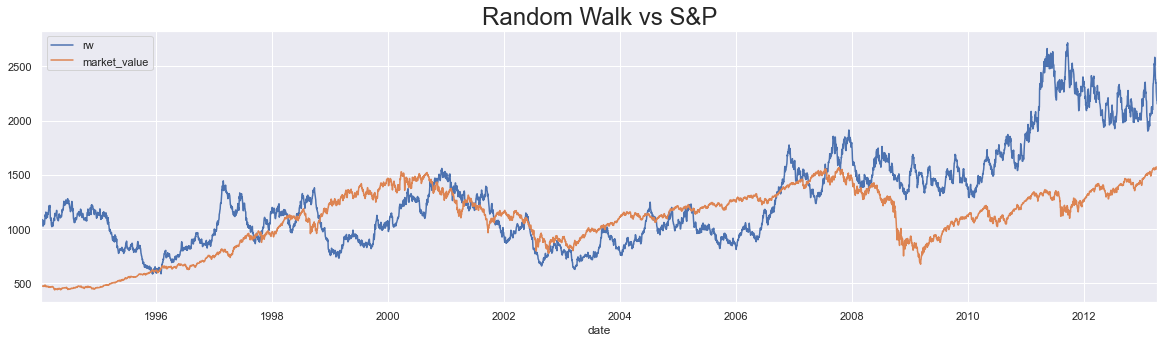

In [62]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title('Random Walk vs S&P' , size = 24)
plt.legend()
plt.show()

## Market efficiency measures the level of difficulty in forecasting correct future values. 

## Arbitrage opportunities: investors buy and sell commodities and make a safe profit while the price adjusts. 

## **Stationarity**. 

###  Taking different samples of data with the same size should have identical convariance. This is called weak-form stationarity or covariance stationarity. 

### This comes with different assumptions such as : 

###  Have a constant mean 

### Have a constant variance 

### Have a consistent covariance between periods which are distanced equaly from one another. Cov($x_{1},x_{4}$) = Cov($x_{3},x_{6}$) 

### White noise satisfys the assumptions of covariance stationary.


### Strict stationarity : samples of identical size must have identical distributions. But this is very rare in the real world. 

 

## Checking for stationarity. 

### This is a hypotesis test which states the following. 

### $H_{0}$ : non stationarity  $\varphi_{1} < 1 $ : 1 lag autocorrelation coefficient is lower than 1.

### $H_{1}$ : non stationarity  $\varphi_{1} = 1$ : 1 lag autocorrelation coefficient is equal to 1.

### If the statistic is lower than the critical value the data came from a stationary process and we reject the null hypotesis. 



In [63]:
sts.adfuller(df.market_value)

(-1.7369847452352452,
 0.41216456967706144,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

### First output :the T statistic (-1.7369). 

### Second output : the p value (0.4121) asociated with the statistic. There is a 40% chance of non rejecting the null hypotesis.  

### Third output:(18) number of lags used in the regression. So there is some autocorrelation from 18 periods. 

### Fourth output : (5002) number of observations. 

### Fifth output : 1%, 5% and 10% are the corresponding critical values from the dicker fully table. These are the level of significance. 

### The T statistic is greater than all the critical values so there is no statistical evidence that confirms that the data is stationary, so we cant reject the null hypothesis. 

### Six output: (39904.880) estimates the maximize information criteria, so there is some apparent autocorrelation. The lower the values, the easier to make predictions for the future. 


In [64]:
sts.adfuller(df.wn)

(-48.28375791396939,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70876.89725083632)

## Since white noise is a stationary process we get a low p-value and since we dont have autocorrelation we dont have any lags involved in the regression. 

In [65]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Random walk cames from a non stationary process. This results that covariances of two intervals with same sizes are rarely equal.

## Each days prices may go up or down but the starting possition is always different. There are intervals with ups and down prices and some intervals with constant increase. 

## **Seasonality**

### Some trends will apperar on a cyclical basis.

### It can be splitted in 3 effects 

#### Trend: explains the pattern in the data 

#### Seasonal : explains the cyclical effects due to seasonality 

#### Residual : error of prediction  difference from the actual and predict data. 


### **Naive decomposition**


#### We expect a linear relation within the 3 parts  and the observed time series. 

#### Additive : for any time period the observed value is the sum of the trend + seasonal + residual for that period. 

#### Additive : for any time period the observed value is the multiplication of the trend *seasonal * residual for that period. 




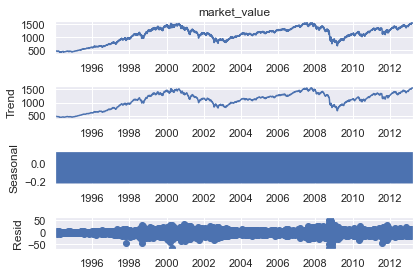

In [66]:
s_dec_additive = seasonal_decompose(df.market_value,model = 'additive')
s_dec_additive.plot()
plt.show()

##  The trend closely resemble the observed series. This is because the decomposition function uses the previous period values as a trend-setter. 

## The seasonal plot looks like a rectangle. This is because the values are constantly oscilating 0.1 -0.2 and the figure size is small. There is no concrete cyclical pattern using Naive decomposition.  No seasonality of the data. 

## The residuals are the errors of our models estimates. They are the difference between the true values and prediction. 

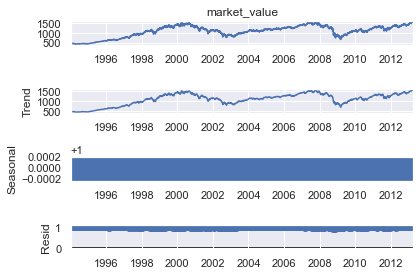

In [67]:
s_dec_multi = seasonal_decompose(df.market_value,model = 'multiplicative')
s_dec_multi.plot()
plt.show()

## Correlation measures the similarity in the change of values of two series. 

## Autocorrelation is the correlation between the values of the time series and a lagged version of itself. 

## **AUTOCORRELATION FUNCTION** (ACF)


### It computes the autocorrelation value of the lags we are interested. 

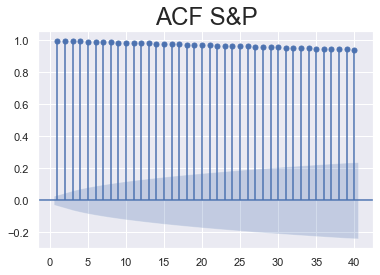

In [68]:
sgt.plot_acf(df.market_value,lags = 40,zero = False) # zero to false because we dont want to take in count current period value in the function the correlation with your self will always be 1. 
plt.title('ACF S&P',size = 24)
plt.show()

## Values in the x axes represents lags. 

## Values in the y axes represents possible values for the autocorrelation coefficients denoted by $\varphi$. It can take values from -1 to 1 

##  The first line represents autocorrelation with one time period ago. The second one represents the coefficient of the autocorrelation with two periods ago. 

## The shaded are represents significance. All the values are situaded outside this shaded region and are greater than zero. This suggest the existence of autocorrelation. There is a time dependency on the data. The prices even a month back can be good estimators. 


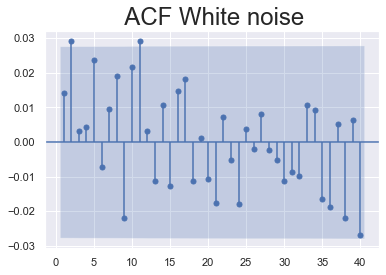

In [73]:
sgt.plot_acf(df.wn,lags = 40,zero = False) # zero to false because we dont want to take in count current period value in the function the correlation with your self will always be 1. 
plt.title(' ACF White noise',size = 24)
plt.show()

## All the coeficients fall in the blue area so there is no autocorrelation for any lag. 

## **Partial autocorrelation**. 

## The 3rd lag can affect the second and the first one with respect the current one. If we want to ommit those interactions and measure the direct relationship between  the current lag and the 3rd without taking in count those interactions we can use the Partial autocorrelation function. 

## PACF measures the direct influence of the lag version $x_{t-2}$ with the current one $x_{t}$. It cancel out the indirect influence of other periods between them. $x_{t-2}$ -- $x_{t-1}$-- $x_{t}$  

## The ACF measures the accumulated effects past lags have on the current value as well as the direct effects, while the PACF measures only the direct effects.




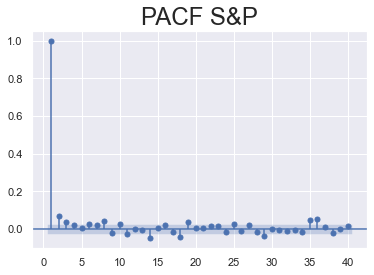

In [70]:
sgt.plot_pacf(df.market_value,lags = 40,zero = False,method= 'ols')
plt.title('PACF S&P',size = 24)
plt.show()

## The ninth (9) lag has a negative coefficient so beyond that lag there seems to be no autocorrelation. All other coefficients falls in the blue region so they are not significant. Only the first lag seems to be significant. So we would include it in our model. 

## Since our data is in business days there is a cyclical change every month, more specifically every 22 days. So the values a month ago, negatively affect the values today. 

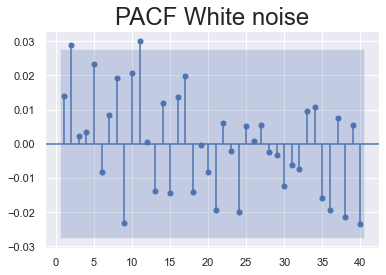

In [71]:
sgt.plot_pacf(df.wn,lags = 40,zero = False,method= 'ols')
plt.title('PACF White noise',size = 24)
plt.show()

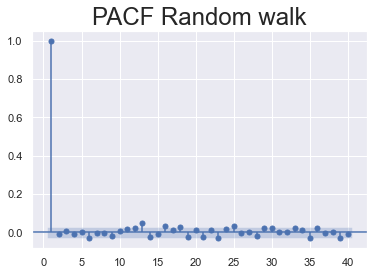

In [72]:
sgt.plot_pacf(df.rw,lags = 40,zero = False,method= 'ols')
plt.title('PACF Random walk',size = 24)
plt.show()

# **MODELS**

## To choose the best model we need the one who has higher log-likelihood and lower information criteria. 

## 1) We need significant coefficients. Those who are significant different from zero (0). 

## 2) Model to be parsimonious simple. 

### To determine if the predictions are significantly better, we introduce an statistical test called the log-likelihood ratio test.

### The llrt can be used only with models with different degrees of freedom. 

### So we would make use of the information criteria of the models because they have the same total number of lags. 

### The lower the coefficient the less data the model requeries to make accurate predictions. 

### AIC and BIC (they must be low)

## 3) If the model fits well, there should be no trend the model account for. So the residuals of the models should resemble white noise this means that $\varepsilon_{t} \sim wn(\mu ,\sigma ^{2})$. This accounts that there are no patterns we have missed. 








## **1) THE AR (Auto Regressive) MODEL**. 

## This is a linear model which takes in count previous values to predict the current ones. 

## $X_{t}$ = C + $\varphi_{1} X_{t-1} + \varepsilon_{t}$

## $X_{t-1}$ : values of x during the previous period. If t is in a weekly frequency, t-1 would represent the value of the sales from the previous week. 

## $\varphi_{1}$ : Any numeric constant by which we multiply the lagged variable. It states how much of the lagged value would count to predict the current one. This is the autocorrelation coefficient. It takes values from 1 and -1. 

## $\varepsilon_{t}$ : The residual which is the difference between our prediction for period t and the correct value. 







## The AR(1) model. 

In [76]:
model_ar = ARIMA(df.market_value, order=(1,0,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 

In [77]:
results_ar = model_ar.fit()

In [78]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 27 Oct 2021   AIC                          40200.776
Time:                        16:05:30   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1060.4197    228.350      4.644      0.000     612.861    1507.978
ar.L1.market_value     0.9994      0.001   1911.816      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

## in the row which say const this indicates the value for the constant C in the AR model. 

## The row that says ar.L1.market_value is the value for $\varphi_{1}$ which is 0.994. This is the autocorrelation coefficient for the first lag $x_{t-1}$. 

## The other values are the standard error which states how far away, on average, the model's predictions are from the true values.

## Next we have the statistic. 

## The p value which is zero. This indicates that the coefficients are significant. 

## And lastly we have critical values for the 95% confidence interval. If zero is not a part of it we can confirm the coefficients are significant. 

## Higher-Lag AR Models. 

In [80]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.280
Method:                       css-mle   S.D. of innovations             13.206
Date:                Wed, 27 Oct 2021   AIC                          40178.559
Time:                        16:16:30   BIC                          40204.645
Sample:                    01-07-1994   HQIC                         40187.700
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1054.2766    249.296      4.229      0.000     565.665    1542.889
ar.L1.market_value     0.9301      0.014     68.023      0.000       0.903       0.957
ar.L2.market_value     0.0694      0.014      5.071      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4080           +0.0000j           14.4080            0.5000
-----------------------------------------------------------------------------
"""

In [81]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 27 Oct 2021   AIC                          40174.694
Time:                        16:17:23   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1054.9114    259.313      4.068      0.000     546.668    1563.155
ar.L1.market_value     0.9277      0.014     68.258      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0507           -5.3049j            5.4080           -0.2811
AR.3           -1.0507           +5.3049j            5.4080            0.2811
-----------------------------------------------------------------------------
"""

In [82]:
model_ar_4 = ARIMA(df.market_value, order=(4,0,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 27 Oct 2021   AIC                          40174.511
Time:                        16:19:23   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.2230    265.308      3.989      0.000     538.230    1578.217
ar.L1.market_value     0.9270      0.014     68.576      0.000       0.900       0.953
ar.L2.market_value     0.0368      0.019      1.952      0.051      -0.000       0.074
ar.L3.market_value     0.0148      0.019      0.772      0.440      -0.023       0.053
ar.L4.market_value     0.0209      0.014      1.478      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9302           -0.0000j            3.9302           -0.5000
AR.3            1.1089           -3.3116j            3.4924           -0.1986
AR.4            1.1089           +3.3116j            3.4924            0.1986
-----------------------------------------------------------------------------
"""

In [84]:
def LLR_test(mod_1,mod_2,DF=1):
    """ Calculates the Log Likelihood ratio  between two models.  

    Args:
        mod_1 : model 1 
        mod_2 : model 2 
        DF (int, optional): degrees of freedom. Since we ususally only compare models with a single difference we set this value to 1.
        
    Returns:
        p (float) : pvalue for the loglikehood test. 
    """
    
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3) #  p value. 
    return p
    

In [85]:
LLR_test(model_ar_2,model_ar_3)

0.015

## The p value is lower than 0.05 so it is significant, therefore we should opt for a more complicated model. eg with more lags. 

In [86]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0)) # 7 states for 7 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.387
Method:                       css-mle   S.D. of innovations             13.187
Date:                Wed, 27 Oct 2021   AIC                          40174.774
Time:                        16:32:10   BIC                          40233.466
Sample:                    01-07-1994   HQIC                         40195.340
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1044.1700    284.391      3.672      0.000     486.773    1601.567
ar.L1.market_value     0.9261      0.013     69.935      0.000       0.900       0.952
ar.L2.market_value     0.0367      0.019      1.966      0.049       0.000       0.073
ar.L3.market_value     0.0139      0.019      0.724      0.469      -0.024       0.052
ar.L4.market_value     0.0138      0.019      0.719      0.472      -0.024       0.052
ar.L5.market_value    -0.0172      0.019     -0.895      0.371      -0.055       0.020
ar.L6.market_value     0.0037      0.019      0.191      0.849      -0.034       0.041
ar.L7.market_value     0.0225      0.014      1.592      0.111      -0.005       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.4420           -1.0292j            1.7716           -0.0987
AR.3            1.4420           +1.0292j            1.7716            0.0987
AR.4           -0.1855           -1.8366j            1.8459           -0.2660
AR.5           -0.1855           +1.8366j            1.8459            0.2660
AR.6           -1.8385           -0.8843j            2.0401           -0.4286
AR.7           -1.8385           +0.8843j            2.0401            0.4286
-----------------------------------------------------------------------------
"""

In [87]:
print("LLR test:"+  str(LLR_test(model_ar,model_ar_7,DF = 6)))

LLR test:0.0


## We need to convert the data to stationary. 

## In finance is better to use returns instead of prices when measuring financial indices.

## Returns expressed the % change between the values for two consecutive periods. 

## Positive return denotes an increase in the price and negative denotes a declaine. 

## Return = ($p_{t} -p_{t-1}) *100/p_{t-1}$



In [88]:
df['returns'] = df.market_value.pct_change(1).mul(100)# percentage change with a distance of 1 between time periods.
df = df.iloc[1:]

In [89]:
sts.adfuller(df.returns)

(-17.03445719098118,
 8.280537020317061e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)